In [2]:
using Clapeyron
using Plots
using CSV
using DataFrames
using LaTeXStrings

# Ternary MEA+H2O+CO2 Model

In [62]:
model_mix = SAFTgammaMie([("MEA",["NH2"=>1, "CH2"=>1, "CH2OH"=>1]),("Water",["H2O"=>1]),("Carbon Dioxide",["CO2"=>1])];

        userlocations = (Mw = [16.02285, 14.02658, 31.03392, 18.01528, 44.01],

        epsilon = [284.78 348.39 528.21 339.89 134.58;

                   348.39 473.39 423.17 423.63 276.45;

                   528.21 423.17 407.22 358.02 312.3;

                   339.89 423.63 358.02 266.68 226.38
                   
                   134.58 276.45 312.3 226.38 207.89],

        sigma = [3.2477, 4.8801, 3.4054, 3.0063, 3.05],

        lambda_a = [6, 6, 6, 6, 5.055],

        lambda_r = [10.354 14.063 52.305 13.085 50.06;

                    14.063 19.871 21.230 100.00 22.873;

                    52.305 21.230 22.699 19.619 24.474;

                    13.085 100.00 19.619 17.020 21.116
            
                    50.06  22.873 24.474 21.116 26.408],

        vst = [1, 1, 2, 1, 2],

        S = [0.79675, 0.22932, 0.58538, 1, 0.84680],

        n_H=[2, 0, 1, 2, 0],

        n_e=[1, 0, 2, 2, 0],

        n_a1=[0, 0, 0, 0, 1],

        n_a1e=[1, 0, 0, 1, 0],

        n_a2=[0, 0, 0, 0, 1],

        n_a2e=[1, 0, 0, 0, 0],

        epsilon_assoc = Dict([(("NH2","H"),("NH2","e")) => 1070.80,

                              (("NH2","H"),("CH2OH","e")) => 629.88,

                              (("NH2","H"),("H2O","e")) => 1364.40,

                              (("CH2OH","H"),("NH2","e")) => 2403.78,

                              (("CH2OH","H"),("CH2OH","e")) => 2097.90,

                              (("CH2OH","H"),("H2O","e")) => 600.00,

                              (("H2O","H"),("NH2","e")) => 1877.50,

                              (("H2O","H"),("CH2OH","e")) => 2000.6,

                              (("H2O","H"),("H2O","e")) => 1985.40,

                              #(("CO2","a1"),("NH2","e")) => 3313,
                
                              #(("CO2","a1"),("H2O","e")) => 1398.1,
                 
                              #(("CO2","a2"),("NH2","e")) => 4943.6]),
                
                              (("CO2","a1"),("NH2","a1e")) => 3313,
                
                              (("CO2","a1"),("H2O","a1e")) => 1398.1,
                 
                              (("CO2","a2"),("NH2","a2e")) => 4943.6]),
        

        bondvol = Dict([(("NH2","H"),("NH2","e")) => 95.225e-30,

                              (("NH2","H"),("CH2OH","e")) => 346.08e-30,

                              (("NH2","H"),("H2O","e")) => 22.450e-30,

                              (("CH2OH","H"),("NH2","e")) => 26.192e-30,

                              (("CH2OH","H"),("CH2OH","e")) => 62.309e-30,

                              (("CH2OH","H"),("H2O","e")) => 490.19e-30,

                              (("H2O","H"),("NH2","e")) => 459.18e-30,

                              (("H2O","H"),("CH2OH","e")) => 130.02e-30,

                              (("H2O","H"),("H2O","e")) => 101.69e-30,

                              #(("CO2","a1"),("NH2","e")) => 3280.3e-30,
                
                              #(("CO2","a1"),("H2O","e")) => 91.419e-30,
                 
                              #(("CO2","a2"),("NH2","e")) => 142.64e-30])));
                
                              (("CO2","a1"),("NH2","a1e")) => 3280.3e-30,
                
                              (("CO2","a1"),("H2O","a1e")) => 91.419e-30,
                 
                              (("CO2","a2"),("NH2","a2e")) => 142.64e-30])));

# Calculate Water and MEA mole fractions at the set weight fractions


In [64]:
wt_MEA = 0.3
wt_H2O = 1-wt_MEA

mw_MEA = 61.08
mw_H2O = 18.01528

x_MEA = (wt_MEA/mw_MEA)*(1/((wt_MEA/mw_MEA)+(wt_H2O/mw_H2O)))
x_H2O = 1-x_MEA
solvrat = x_H2O/x_MEA

@show x_MEA
@show x_H2O
@show solvrat

x_MEA = 0.11222006776329788
x_H2O = 0.8877799322367022
solvrat = 7.911062165006595


7.911062165006595

# Now create the loadings of CO2 and recalculate the mole fractions in the liquid phase

In [68]:
load = LinRange(0, 1.2, 100) #these are the ratio of CO2 mols to MEA mols in solution
@show load

N = length(load)

# intialise new composition vectors
x_MEA = zeros(N, 1)
x_H2O = zeros(N, 1)
x_CO2 = zeros(N, 1)
z = zeros(N, 3)

# calculate the new liquid compositions at these loadings
x_MEA = 1 ./ (1 .+ load .+ solvrat)
x_CO2 = x_MEA .* load
x_H2O = 1 .- x_MEA .- x_CO2
z = hcat(x_MEA, x_H2O, x_CO2)

load = LinRange{Float64}(0.0, 1.2, 100)


100×3 Matrix{Float64}:
 0.11222    0.88778   0.0
 0.112068   0.886574  0.0013584
 0.111916   0.885371  0.00271311
 0.111764   0.884172  0.00406415
 0.111613   0.882976  0.00541153
 0.111462   0.881783  0.00675527
 0.111312   0.880593  0.00809539
 0.111162   0.879406  0.0094319
 0.111012   0.878223  0.0107648
 0.110863   0.877043  0.0120941
 0.110714   0.875866  0.0134199
 0.110566   0.874692  0.0147421
 0.110418   0.873522  0.0160608
 ⋮                    
 0.100223   0.792872  0.106905
 0.100102   0.79191   0.107988
 0.0999803  0.79095   0.109069
 0.0998593  0.789993  0.110148
 0.0997385  0.789038  0.111224
 0.0996181  0.788085  0.112297
 0.099498   0.787135  0.113367
 0.0993781  0.786186  0.114435
 0.0992586  0.785241  0.115501
 0.0991393  0.784297  0.116564
 0.0990203  0.783356  0.117624
 0.0989016  0.782417  0.118682

# Can now calculate the expected vapour phase composition and pressure in equilibrium with this mixture

In [71]:
T = [273.15, 298.15, 313.15, 333.15, 353.15, 373.15]

pvap = zeros(N, 6)
y = zeros(N, 3, 6)
partial = zeros(N, 6)

for j in 1:6
        
for i in 1:N
    x_bub = z[i, :]
    calc = bubble_pressure(model_mix, T[j], x_bub)
    pvap[i, j] = calc[1]
    y[i, 1, j] = calc[4][1]
    y[i, 2, j] = calc[4][2]
    y[i, 3, j] = calc[4][3]
end

end

partialT1 = pvap[2:100, 1] .* y[2:100, 3, 1]
partialT2 = pvap[2:100, 2] .* y[2:100, 3, 2]
partialT3 = pvap[2:100, 3] .* y[2:100, 3, 3]
partialT4 = pvap[2:100, 4] .* y[2:100, 3, 4]
partialT5 = pvap[2:100, 5] .* y[2:100, 3, 5]
partialT6 = pvap[2:100, 6] .* y[2:100, 3, 6]
#partial = pvap.*y[:,3]
#partialfil = partial[2:100]


loadfil = load[2:100]

@show y

y = [6.787481258815669e-7 0.9999993212518741 0.0; 6.659458625124422e-7 0.9999917500516733 7.584002464144923e-6; 6.532238084317724e-7 0.9999839873676202 1.535940857144702e-5; 6.405833209364807e-7 0.9999760224812235 2.3336935455531282e-5; 6.280257812837598e-7 0.9999678440790036 3.152789521509991e-5; 6.155525832436564e-7 0.9999594402101044 3.994423731235042e-5; 6.031651383756939e-7 0.9999507982404554 4.8598594406201734e-5; 5.908648681136673e-7 0.9999419048031903 5.750433194151583e-5; 5.786532106401688e-7 0.9999327457449392 6.667560185014132e-5; 5.66531615879789e-7 0.9999233060676243 7.612740075990665e-5; 5.545015489099093e-7 0.9999135698653014 8.587563314965685e-5; 5.425644841966936e-7 0.999903520255576 9.593717993972017e-5; 5.307219077707473e-7 0.999893139305038 0.00010632997305426439; 5.189753125031995e-7 0.9998824079481222 0.00011707307656527721; 5.073262168527802e-7 0.9998713058986949 0.00012818677508830145; 4.957761303337469e-7 0.9998598115536906 0.00013969267017899245; 4.84326580077

100×3×6 Array{Float64, 3}:
[:, :, 1] =
 6.78748e-7  0.999999    0.0
 6.65946e-7  0.999992    7.584e-6
 6.53224e-7  0.999984    1.53594e-5
 6.40583e-7  0.999976    2.33369e-5
 6.28026e-7  0.999968    3.15279e-5
 6.15553e-7  0.999959    3.99442e-5
 6.03165e-7  0.999951    4.85986e-5
 5.90865e-7  0.999942    5.75043e-5
 5.78653e-7  0.999933    6.66756e-5
 5.66532e-7  0.999923    7.61274e-5
 5.54502e-7  0.999914    8.58756e-5
 5.42564e-7  0.999904    9.59372e-5
 5.30722e-7  0.999893    0.00010633
 ⋮                       
 2.08191e-8  0.013168    0.986832
 2.07434e-8  0.0110662   0.988934
 2.06638e-8  0.00952058  0.990479
 2.05825e-8  0.00833672  0.991663
 2.05008e-8  0.0074014   0.992599
 2.04194e-8  0.00664415  0.993356
 2.03388e-8  0.00601887  0.993981
 2.02593e-8  0.0054941   0.994506
 2.01813e-8  0.00504763  0.994952
 2.01048e-8  0.00466336  0.995337
 2.003e-8    0.00432931  0.995671
 1.99569e-8  0.0040364   0.995964

[:, :, 2] =
 3.30323e-6  0.999997    0.0
 3.23894e-6  0.999982    1

# Import the relevant Values from Felipe's code

In [73]:
dataT2 = CSV.read("solubilityCO2_MEA_C1_T2.csv", DataFrame; header=false)
#dataT3 = CSV.read("solubilityCO2_MEA_C1_T2.csv", DataFrame; header=false)
#dataT4 = CSV.read("solubilityCO2_MEA_C1_T2.csv", DataFrame; header=false)

rename!(dataT2, ["Loading", "Pressure", "xH2O", "xMEA", "xCO2"]);

loadingexp = dataT2.Loading
pressureexp = dataT2.Pressure
yCO2exp = dataT2.xCO2
partialexp = pressureexp .* yCO2exp


partialexpfil = partialexp[2:100]
loadingexpfil = loadingexp[2:100]

@show loadingexp
@show partialexpfil

loadingexp = [0.0, 0.012121212, 0.024242424, 0.036363636, 0.048484848, 0.060606061, 0.072727273, 0.084848485, 0.096969697, 0.109090909, 0.121212121, 0.133333333, 0.145454545, 0.157575758, 0.16969697, 0.181818182, 0.193939394, 0.206060606, 0.218181818, 0.23030303, 0.242424242, 0.254545455, 0.266666667, 0.278787879, 0.290909091, 0.303030303, 0.315151515, 0.327272727, 0.339393939, 0.351515152, 0.363636364, 0.375757576, 0.387878788, 0.4, 0.412121212, 0.424242424, 0.436363636, 0.448484848, 0.460606061, 0.472727273, 0.484848485, 0.496969697, 0.509090909, 0.521212121, 0.533333333, 0.545454545, 0.557575758, 0.56969697, 0.581818182, 0.593939394, 0.606060606, 0.618181818, 0.63030303, 0.642424242, 0.654545455, 0.666666667, 0.678787879, 0.690909091, 0.703030303, 0.715151515, 0.727272727, 0.739393939, 0.751515152, 0.763636364, 0.775757576, 0.787878788, 0.8, 0.812121212, 0.824242424, 0.836363636, 0.848484848, 0.860606061, 0.872727273, 0.884848485, 0.896969697, 0.909090909, 0.921212121, 0.933333333, 

99-element Vector{Float64}:
 0.0937176356557504
 0.19760261670799648
 0.3128974519506
 0.44102488141877805
 0.583619817950546
 0.7425773336946061
 0.92007705637764
 1.118663289430621
 1.341298560313075
 1.59145941380472
 1.873227981370155
 2.191437658702125
 2.551832023892547
 ⋮
 2.975741665461441e6
 3.123501744939415e6
 3.275230613536726e6
 3.431060573761732e6
 3.5911595570328133e6
 3.7557382496445808e6
 3.9250593418264254e6
 4.099449703834453e6
 4.279316920167037e6
 4.465172341684491e6
 4.657664219629534e6
 4.857627164733438e6

# Plot the Results

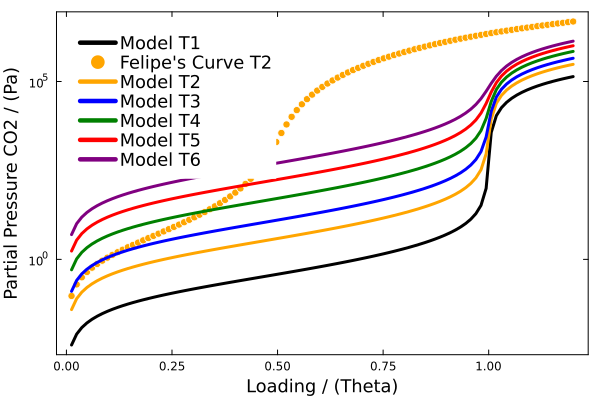

In [82]:
plt = plot(grid = :off, 
           framestyle = :box, 
           foreground_color_legend = nothing,
           yaxis =:log,
           legend =:topleft,
           legend_font = font(12))

plot!(plt, loadfil, partialT1, 
      color = "black", 
      line = (:path, 3), 
      label = "Model T1")


plot!(plt, loadingexpfil, partialexpfil, 
      seriestype = :scatter, 
      color = "orange", 
      markerstrokecolor = "white", 
      line = (:scatter, 0.4), 
      label = "Felipe's Curve T2")

plot!(plt, loadfil, partialT2, 
      color = "orange", 
      line = (:path, 3), 
      label = "Model T2")

plot!(plt, loadfil, partialT3, 
      color = "blue", 
      line = (:path, 3), 
      label = "Model T3")

plot!(plt, loadfil, partialT4, 
      color = "green", 
      line = (:path, 3), 
      label = "Model T4")

plot!(plt, loadfil, partialT5, 
      color = "red", 
      line = (:path, 3), 
      label = "Model T5")

plot!(plt, loadfil, partialT6, 
      color = "purple", 
      line = (:path, 3), 
      label = "Model T6")


xlabel!(plt, "Loading / (Theta)", xguidefontsize = 12)
ylabel!(plt, "Partial Pressure CO2 / (Pa)", yguidefontsize = 12)

#savefig(plt, "Loading_T2")

# check Felipe's other Values

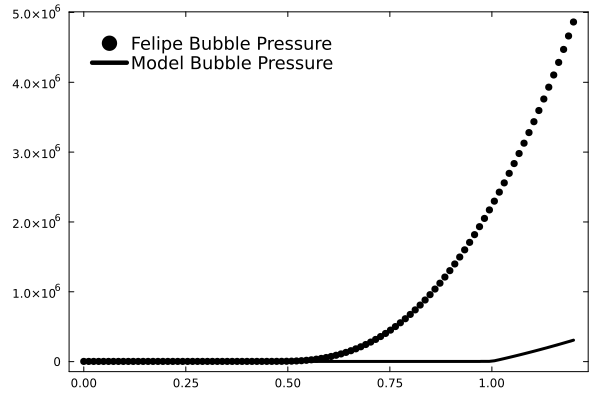

In [89]:
plt1 = plot(grid = :off, 
           framestyle = :box, 
           foreground_color_legend = nothing,
           legend =:topleft,
           legend_font = font(12))

plot!(plt1, loadingexp, pressureexp, 
      color = "black", 
      line = (:scatter, 0.4), 
      label = "Felipe Bubble Pressure")

plot!(plt1, load, pvap[:, 2], 
      color = "black", 
      line = (:path, 3), 
      label = "Model Bubble Pressure")


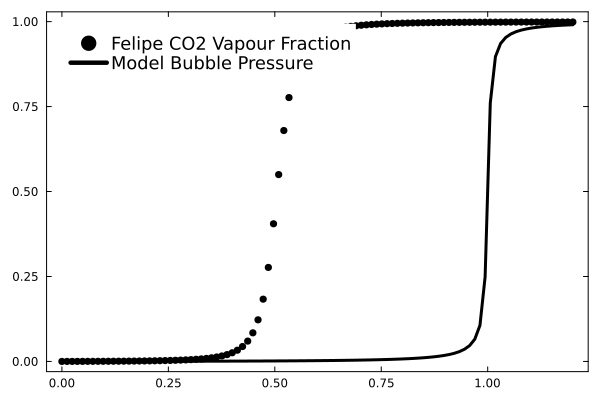

In [91]:
plt2 = plot(grid = :off, 
           framestyle = :box, 
           foreground_color_legend = nothing,
           legend =:topleft,
           legend_font = font(12))

plot!(plt2, loadingexp, yCO2exp, 
      color = "black", 
      line = (:scatter, 0.4), 
      label = "Felipe CO2 Vapour Fraction")

plot!(plt2, load, y[:, 3, 2], 
      color = "black", 
      line = (:path, 3), 
      label = "Model Bubble Pressure")